In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [3]:
import os
plt.style.use(os.path.join(os.getcwd(), 'mystyle.mplstyle'))

In [7]:
import urllib.request

In [8]:
suicide_rate_url = 'http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/MH_12&profile=crosstable&filter=COUNTRY:*;REGION:*&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR;SEX'
local_filename, headers = urllib.request.urlretrieve(suicide_rate_url, filename='who_suicide_rates.csv')

In [13]:
local_filename = 'data/who_suicide_rates.csv_backup'
from pandas_datareader import data, wb
rates = pd.read_csv(local_filename, names=['Country', 'Both', 'Female', 'Male'], skiprows=3)
rates.head(10)

,Country,Both,Female,Male
0,Afghanistan,5.7,5.3,6.2
1,Albania,5.9,5.2,6.6
2,Algeria,1.9,1.5,2.3
3,Angola,13.8,7.3,20.7
4,Argentina,10.3,4.1,17.2
5,Armenia,2.9,0.9,5.0
6,Australia,10.6,5.2,16.1
7,Austria,11.5,5.4,18.2
8,Azerbaijan,1.7,1.0,2.4
9,Bahamas,2.3,1.3,3.6


Text(0.5,0,'Rate')

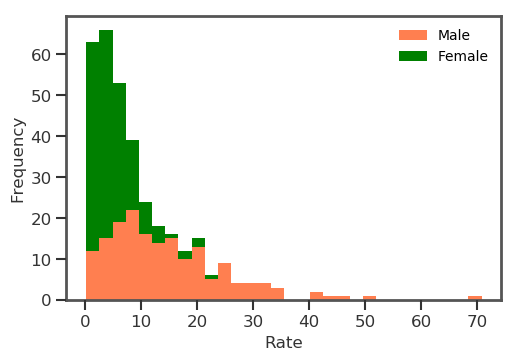

In [14]:
rates.plot.hist(stacked=True, y=['Male', 'Female'], bins=30, color=['Coral', 'Green'])
plt.xlabel('Rate')

In [15]:
print(rates['Male'].mean(), rates['Female'].mean())

14.695906432748538 5.070760233918128


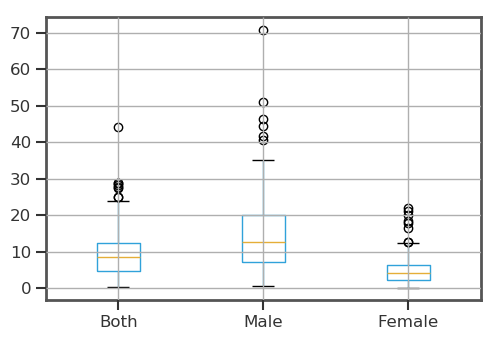

In [16]:
rates.boxplot(['Both', 'Male', 'Female'])

In [17]:
print(rates[rates['Both']>40])

   Country  Both  Female  Male
66  Guyana  44.2    22.1  70.8


In [21]:
def plot_cdf(data, plot_range=None, scale_to=None, nbins=False, **kwargs):
    if not nbins:
        nbins = len(data)
    sorted_data = np.array(sorted(data), dtype=np.float64)
    data_range = sorted_data[-1] - sorted_data[0]
    counts, bin_edges = np.histogram(sorted_data, bins=nbins)
    xvalues = bin_edges[1:]
    yvalues = np.cumsum(counts)
    if plot_range is None:
        xmin = xvalues[0]
        xmax = xvalues[-1]
    else:
        xmin, xmax = plot_range
    xvalues = np.concatenate([[xmin, xvalues[0]], xvalues, [xmax]])
    yvalues = np.concatenate([[0.0, 0.0], yvalues, [yvalues.max()]])
    if scale_to:
        yvalues = yvalues / len(data) * scale_to
    plt.axis([xmin, xmax, 0, yvalues.max()])
    return plt.step(xvalues, yvalues, **kwargs)
    

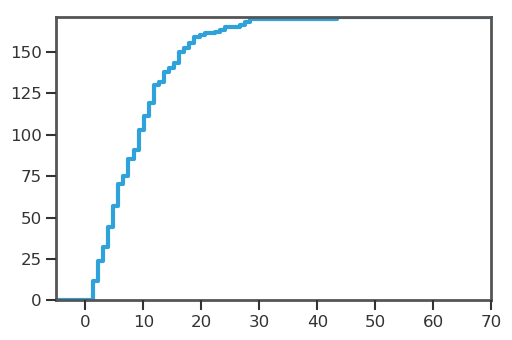

In [22]:
plot_cdf(rates['Both'], nbins=50, plot_range=[-5, 70])

((array([-2.64826633, -2.33322292, -2.15314298, -2.02391947, -1.92165302,
         -1.83625178, -1.76246111, -1.69718116, -1.63842335, -1.58483246,
         -1.53544156, -1.48953557, -1.44657001, -1.40612037, -1.3678489 ,
         -1.33148227, -1.29679606, -1.26360354, -1.23174767, -1.201095  ,
         -1.17153114, -1.14295725, -1.11528728, -1.08844585, -1.06236652,
         -1.03699042, -1.0122651 , -0.98814363, -0.96458382, -0.94154762,
         -0.91900053, -0.89691123, -0.87525112, -0.85399407, -0.83311607,
         -0.81259506, -0.79241067, -0.77254407, -0.75297781, -0.73369566,
         -0.71468252, -0.69592431, -0.67740783, -0.65912076, -0.64105151,
         -0.62318918, -0.60552351, -0.58804483, -0.57074399, -0.55361232,
         -0.53664162, -0.5198241 , -0.50315233, -0.48661926, -0.47021815,
         -0.45394257, -0.43778637, -0.42174364, -0.40580873, -0.38997621,
         -0.37424085, -0.35859762, -0.34304166, -0.32756827, -0.31217292,
         -0.29685121, -0.28159888, -0.

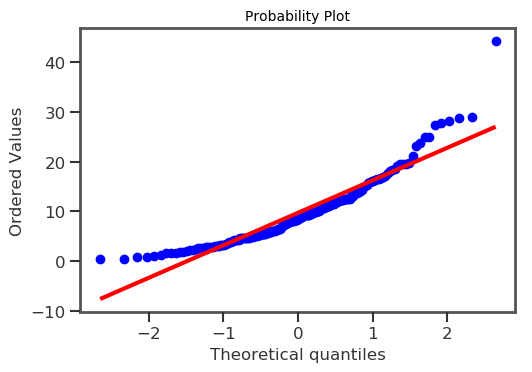

In [23]:
st.probplot(rates['Both'], dist='norm', plot=plt)

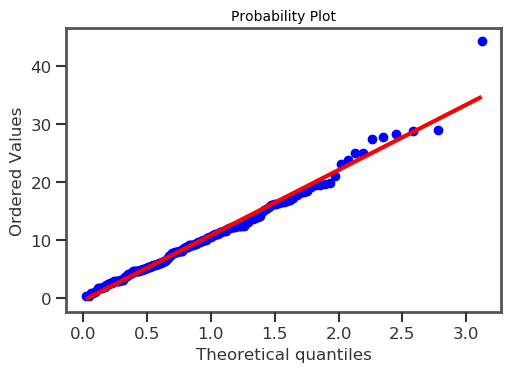

In [24]:
eta = 1.
beta = 1.5
rvweib = st.weibull_min(beta, scale=eta)
results = st.probplot(rates['Both'], dist=rvweib, plot=plt)

In [25]:
st.weibull_min.fit?

In [26]:
beta, loc, eta = st.weibull_min.fit(rates['Both'], floc=0, scale = 12)
print(beta, loc, eta)

1.4851142482688444 0 10.760147674324672


(array([ 9., 13., 17., 22., 15., 11., 11., 14.,  7., 16., 10.,  3.,  5.,
         4.,  4.,  3.,  1.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.]),
 array([ 0.15540506,  1.40529778,  2.6551905 ,  3.90508322,  5.15497594,
         6.40486866,  7.65476138,  8.90465411, 10.15454683, 11.40443955,
        12.65433227, 13.90422499, 15.15411771, 16.40401044, 17.65390316,
        18.90379588, 20.1536886 , 21.40358132, 22.65347404, 23.90336676,
        25.15325949, 26.40315221, 27.65304493, 28.90293765, 30.15283037,
        31.40272309, 32.65261582, 33.90250854, 35.15240126, 36.40229398,
        37.6521867 ]),
 <a list of 30 Patch objects>)

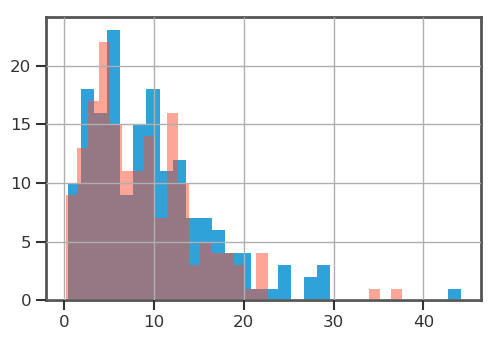

In [28]:
rates['Both'].hist(bins=30)
np.random.seed(1100)
rvweib = st.weibull_min(beta, scale=eta)
plt.hist(rvweib.rvs(size=len(rates.Both)), bins=30, alpha=0.5)

(-2, 50)

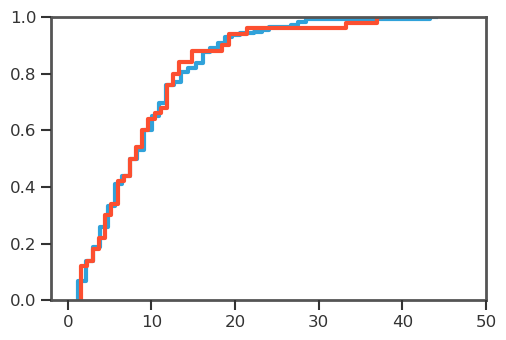

In [29]:
plot_cdf(rates['Both'], nbins=50, scale_to=1)
np.random.seed(1100)
plot_cdf(rvweib.rvs(size=50), scale_to=1)
plt.xlim(-2, 50)

In [30]:
coords = pd.read_csv('data/country_centroids/country_centroids_primary.csv', sep='\t')
coords.keys()

Index(['LAT', 'LONG', 'DMS_LAT', 'DMS_LONG', 'MGRS', 'JOG', 'DSG', 'AFFIL',
       'FIPS10', 'SHORT_NAME', 'FULL_NAME', 'MOD_DATE', 'ISO3136'],
      dtype='object')

In [31]:
coords.head()

,LAT,LONG,DMS_LAT,DMS_LONG,MGRS,JOG,DSG,AFFIL,FIPS10,SHORT_NAME,FULL_NAME,MOD_DATE,ISO3136
0,33.000000,66.0,330000,660000,42STB1970055286,NI42-09,PCLI,NaN,AF,Afghanistan,Islamic Republic of Afghanistan,2009-04-10,AF
1,41.000000,20.0,410000,200000,34TDL1589839239,NK34-08,PCLI,NaN,AL,Albania,Republic of Albania,2007-02-28,AL
2,28.000000,3.0,280000,30000,31REL0000097202,NH31-15,PCLI,NaN,AG,Algeria,People's Democratic Republic of Algeria,2011-03-03,DZ
3,-14.333333,-170.0,-142000,-1700000,1802701,NaN,PCLD,US,AS,American Samoa,Territory of American Samoa,1998-10-06,AS
4,42.500000,1.5,423000,13000,31TCH7675006383,NK31-04,PCLI,NaN,AN,Andorra,Principality of Andorra,2007-02-28,AD


In [33]:
rates['Lat'] = ''
rates['Lon'] = ''
for i in coords.index:
    ind = rates.Country.isin([coords.SHORT_NAME[i]])
    val = coords.loc[i, ['LAT', 'LONG']].values.astype('float')
    rates.loc[ind, ['Lat', 'Lon']] = list(val)

In [34]:
rates.head()

,Country,Both,Female,Male,Lat,Lon
0,Afghanistan,5.7,5.3,6.2,33,66
1,Albania,5.9,5.2,6.6,41,20
2,Algeria,1.9,1.5,2.3,28,3
3,Angola,13.8,7.3,20.7,-12.5,18.5
4,Argentina,10.3,4.1,17.2,-34,-64


In [35]:
rates.loc[rates.Lat.isin(['']), ['Lat']] = np.nan
rates.loc[rates.Lon.isin(['']), ['Lon']] = np.nan
rates[['Lat', 'Lon']] = rates[['Lat', 'Lon']].astype('float')

In [36]:
rates['DEF'] = ''
rates['DEF'] = abs(rates.Lat)
rates['DEF'] = rates['DEF'].astype('float')

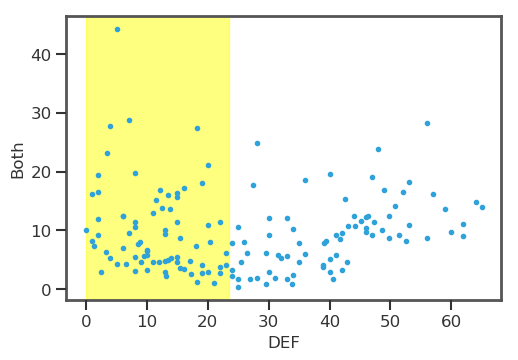

In [38]:
import matplotlib.patches as patches
import matplotlib.transforms as transforms

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rates.DEF, rates.Both, '.')
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
rect = patches.Rectangle((0,0), width=23.5, height=1, transform=trans, color='yellow', alpha=0.5)
ax.set_xlabel('DEF')
ax.set_ylabel('Both')
ax.add_patch(rect)

Text(0,0.5,'Counts')

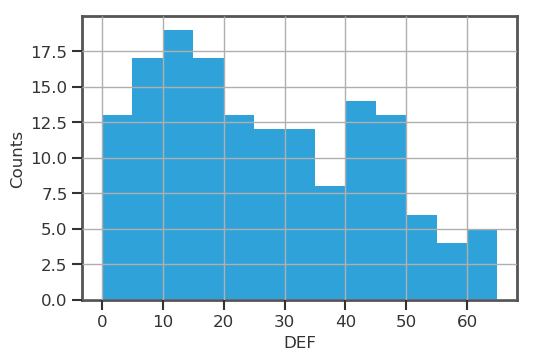

In [40]:
rates.DEF.hist(bins=13)
plt.xlabel('DEF')
plt.ylabel('Counts')

In [41]:
bins = np.arange(23.5, 65+1, 10, dtype='float')
bins = np.linspace(23.5, 65, 11, dtype='float')
groups_rates = rates.groupby(np.digitize(rates.DEF, bins))

Text(0,0.5,'Both')

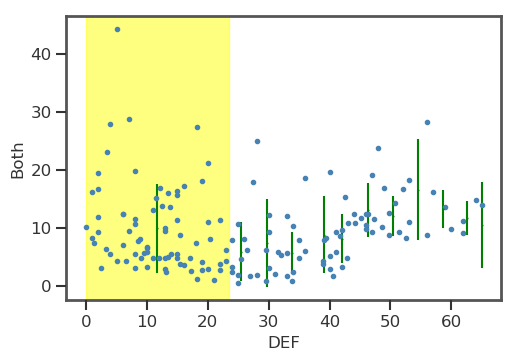

In [44]:
import matplotlib.patches as patches
import matplotlib.transforms as transforms

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(groups_rates.mean().DEF, groups_rates.mean().Both, yerr=np.array(groups_rates.std().Both), marker='.', ls='None',
           lw=1.5, color='Green', ms=1)
ax.plot(rates.DEF, rates.Both, '.', color='SteelBlue', ms=6)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
rect = patches.Rectangle((0,0), width=23.5, height=1, transform=trans, color='Yellow', alpha=0.5)
ax.add_patch(rect)
ax.set_xlabel('DEF')
ax.set_ylabel('Both')

In [45]:
from scipy.stats import linregress
mindfe = 30
selection = ~rates.DEF.isnull()*rates.DEF>mindfe
rv = rates[selection].as_matrix(columns=['DEF', 'Both'])
a, b, r, p, stderr = linregress(rv.T)
print('slope:{0:.4f}\nintercept:{1:.4f}\nrvalue:{2:.4f}\npvalue:{3:.4f}\nstderr:{4:.4f}'.format(a, b, r, p, stderr))

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [48]:
import statsmodels.formula.api as smf

In [52]:
mod = smf.ols("Both ~ DEF", rates[selection]).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   Both   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     20.06
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           3.65e-05
Time:                        11:27:12   Log-Likelihood:                -175.72
No. Observations:                  59   AIC:                             355.4
Df Residuals:                      57   BIC:                             359.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2373      3.272     -1.295      0.2

(0.0, 68.0)

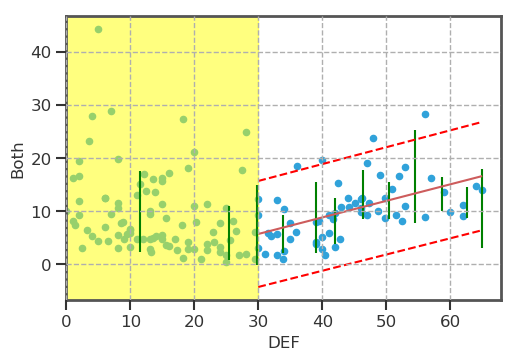

In [55]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(mod)

fig = plt.figure()
ax = fig.add_subplot(111)
rates.plot(kind='scatter', x='DEF', y='Both', ax=ax)
xmin, xmax = min(rates['DEF']), max(rates['DEF'])
ax.plot([mindfe, xmax], [mod.fittedvalues.min(), mod.fittedvalues.max()], 'IndianRed', lw=1.5)
ax.plot([mindfe, xmax], [iv_u.min(), iv_u.max()], 'r--', lw=1.5)
ax.plot([mindfe, xmax], [iv_l.min(), iv_l.max()], 'r--', lw=1.5)
ax.errorbar(groups_rates.mean().DEF, groups_rates.mean().Both, yerr = np.array(groups_rates.std().Both), ls='None',
           lw=1.5, color='Green')
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
rect = patches.Rectangle((0,0), width=mindfe, height=1, transform=trans, color='Yellow', alpha=0.5)
ax.add_patch(rect)
ax.grid(lw=1, ls='dashed')
ax.set_xlim(xmin, xmax+3)

In [58]:
from pandas_datareader import data, wb
wb.search('gdp.*capita.*').iloc[:, :2].head(10)

,id,name
680,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
5481,FB.DPT.INSU.PC.ZS,Deposit insurance coverage (% of GDP per capita)
8958,NE.GDI.FTOT.CR,GDP expenditure on gross fixed capital formati...
8965,NE.GDI.FTOT.SNA08.CR,GDP expenditure on gross fixed capital formati...
9042,NV.AGR.PCAP.KD.ZG,Real agricultural GDP per capita growth rate (%)
9264,NY.GDP.PCAP.CD,GDP per capita (current US$)
9265,NY.GDP.PCAP.CN,GDP per capita (current LCU)
9266,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$)
9267,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %)
9268,NY.GDP.PCAP.KN,GDP per capita (constant LCU)


In [59]:
dat = wb.download(indicator='NY.GDP.PCAP.PP.CD', country='all', start=2014, end=2014)
dat.head()

,,NY.GDP.PCAP.PP.CD
country,year,
Arab World,2014,16213.193326
Caribbean small states,2014,15138.197604
Central Europe and the Baltics,2014,24984.966705
Early-demographic dividend,2014,8166.747022
East Asia & Pacific,2014,14695.656564


In [60]:
country = np.array(dat.index.tolist())[:,0]
gdp = np.array(np.array(dat['NY.GDP.PCAP.PP.CD']))
data = pd.DataFrame(data=np.array([country, gdp]).T, columns=['country', 'gdp'])
print(dat['NY.GDP.PCAP.PP.CD'].head())
print(data.head())

country                         year
Arab World                      2014    16213.193326
Caribbean small states          2014    15138.197604
Central Europe and the Baltics  2014    24984.966705
Early-demographic dividend      2014     8166.747022
East Asia & Pacific             2014    14695.656564
Name: NY.GDP.PCAP.PP.CD, dtype: float64
                          country               gdp
0                      Arab World  16213.1933263674
1          Caribbean small states  15138.1976044659
2  Central Europe and the Baltics  24984.9667048871
3      Early-demographic dividend  8166.74702158105
4             East Asia & Pacific  14695.6565639546


In [64]:
rates['GDP_CD']=''
for i in np.arange(len(data)):
    rates.loc[rates.Country.isin([data.country[i]]), ['GDP_CD']] = data.loc[i, ['gdp']].values.astype('float')
rates.loc[rates.GDP_CD.isin(['']), ['GDP_CD']] = np.nan

In [65]:
print(rates[rates.Country=='Sweden'])
print(data[data.country=='Sweden'])
print(data.loc[218, ['gdp']].values.astype('float'))
rates.loc[rates.Country.isin(['Sweden'])]

    Country  Both  Female  Male   Lat   Lon   DEF   GDP_CD
146  Sweden  11.1     6.1  16.2  62.0  15.0  62.0  47184.7
    country               gdp
234  Sweden  47184.6691338182
[84423.19134327]


,Country,Both,Female,Male,Lat,Lon,DEF,GDP_CD
146,Sweden,11.1,6.1,16.2,62.0,15.0,62.0,47184.7


In [67]:
selection = ~rates.DEF.isnull()*rates.DEF>mindfe
selection *= ~rates.GDP_CD.isnull()

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


Text(0.5,0,'Suicide rate')

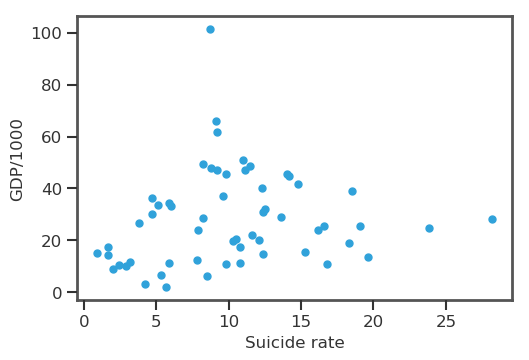

In [68]:
plt.plot(rates[selection].Both.values, rates[selection].GDP_CD.values/1000, '.', ms=10)
plt.ylabel('GDP/1000')
plt.xlabel('Suicide rate')

Text(0.5,0,'DEF')

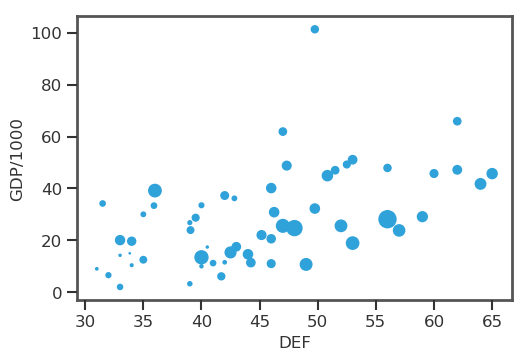

In [69]:
plt.scatter(rates[selection].DEF.values, rates[selection].GDP_CD.values/1000, s=rates[selection].Both.values**1.5)
plt.ylabel('GDP/1000')
plt.xlabel('DEF')

In [70]:
import statsmodels.api as sm

In [71]:
A = rates[selection][['DEF', 'GDP_CD']].astype('float')
A['GDP_CD'] = A['GDP_CD']/1000
b = rates[selection]['Both'].astype('float')
A = sm.add_constant(A)
est = sm.OLS(b, A).fit()

In [75]:
from  mpl_toolkits.mplot3d import Axes3D

Text(0.5,0,'Both')

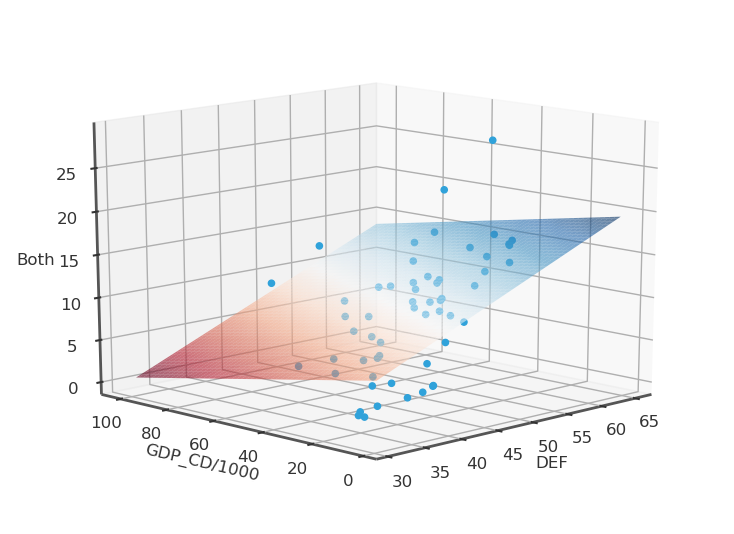

In [78]:
X, Y = np.meshgrid(np.linspace(A.DEF.min(), A.DEF.max(), 100), np.linspace(A.GDP_CD.min(), A.GDP_CD.max(), 100))
Z = est.params[0] + est.params[1]*X+est.params[2]*Y
fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig, azim=-135, elev=15)
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.RdBu, alpha=0.6, linewidth=0)
resid = b - est.predict(A)
ax.scatter(A.DEF, A.GDP_CD, b, alpha=1.0)
ax.set_xlabel('DEF')
ax.set_ylabel('GDP_CD/1000')
ax.set_zlabel('Both')

In [79]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   Both   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     10.80
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           0.000113
Time:                        11:21:46   Log-Likelihood:                -169.74
No. Observations:                  57   AIC:                             345.5
Df Residuals:                      54   BIC:                             351.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4745      3.428     -1.597      0.1

<IPython.core.display.Javascript object>


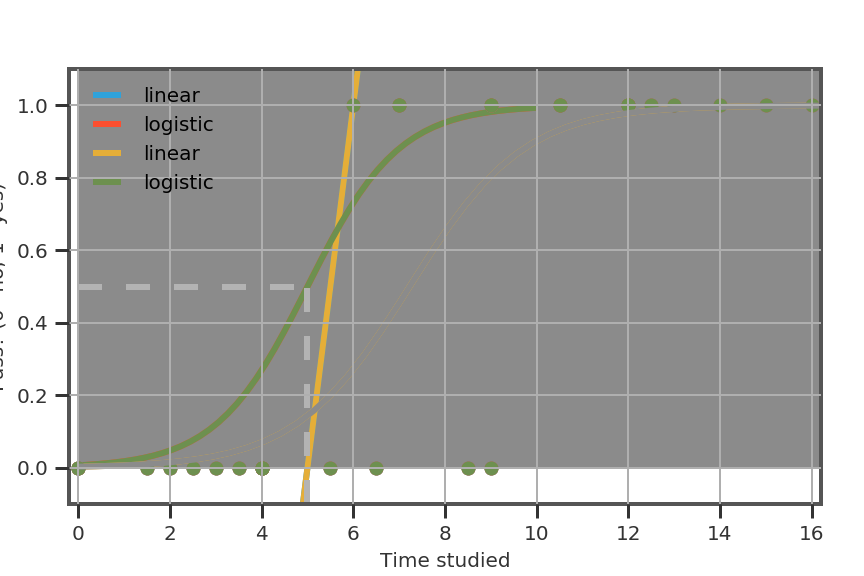

Text(0,0.5,'DEF')

In [82]:
%matplotlib notebook
selection2 = ~rates.DEF.isnull()

plt.scatter(rates[selection2].GDP_CD.values/1000, rates[selection2].DEF.values, s=rates[selection2].Both.values**1.5)
plt.xlabel('GDP/1000')
plt.ylabel('DEF')

In [83]:
data = pd.DataFrame(data=rates[['Country', 'Both', 'Male', 'Female', 'GDP_CD', 'DEF']][~rates.DEF.isnull()])
data.head()

,Country,Both,Male,Female,GDP_CD,DEF
0,Afghanistan,5.7,6.2,5.3,2069.42,33.0
1,Albania,5.9,6.6,5.2,11259.2,41.0
2,Algeria,1.9,2.3,1.5,13003.2,28.0
3,Angola,13.8,20.7,7.3,8179.3,12.5
4,Argentina,10.3,17.2,4.1,19683.8,34.0


In [91]:
TABLE_FILE = 'data_ch4.h5'
data.to_hdf(TABLE_FILE, 'ch4data', mode='w')  
##pytables is required

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Country', 'GDP_CD'], dtype='object')]

  encoding=encoding,


In [92]:
d2 = pd.read_hdf(TABLE_FILE)
d2.head()

,Country,Both,Male,Female,GDP_CD,DEF
0,Afghanistan,5.7,6.2,5.3,2069.42,33.0
1,Albania,5.9,6.6,5.2,11259.2,41.0
2,Algeria,1.9,2.3,1.5,13003.2,28.0
3,Angola,13.8,20.7,7.3,8179.3,12.5
4,Argentina,10.3,17.2,4.1,19683.8,34.0


In [93]:
k = 1.
m = -5.
y = lambda x:k*x+m
p = lambda x: 1/(1+np.exp(-1*(k*x+m)))

In [98]:
xx = np.linspace(0, 10)
plt.plot(xx, y(xx), label='linear')
plt.plot(xx, p(xx), label='logistic')
plt.plot([0, abs(m)], [0.5, 0.5], dashes=(4,4), color='.7')
plt.plot([abs(m), abs(m)], [-.1, .5], dashes=(4,4), color='.7')
plt.ylim(-.1, 1.1)
plt.legend(loc=2)
plt.ylabel('p')
plt.xlabel('xx')

Text(0.5,24,'xx')

In [99]:
studytime = [0,0,1.5,2,2.5,3,3.5,4,4,4,5.5,6,6.5,7,7,8.5,9,9,9,10.5,10.5,12,12,12,12.5,13,14,15,16,18]
passed = [0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1]
data = pd.DataFrame(data=np.array([studytime,passed]).T, columns=['Time', 'Pass'])

In [100]:
data.Time.hist(bins=6)
plt.xlabel('Time')
plt.ylabel('No. students')

Text(8.37,0.5,'No. students')

In [101]:
plt.plot(data.Time, data.Pass, 'o', mew=0, ms=7,)
plt.ylim(-.1, 1.1)
plt.xlim(-0.2, 16.2)
plt.xlabel('Time studied')
plt.ylabel('Pass? (0=no, 1=yes)')


Text(8.37,0.5,'Pass? (0=no, 1=yes)')

In [113]:
import statsmodels.api as sm

In [103]:
probfit = sm.Logit(data.Pass, sm.add_constant(data.Time, prepend=True))

In [104]:
fit_results = probfit.fit()

Optimization terminated successfully.
         Current function value: 0.251107
         Iterations 8


In [106]:
print(fit_results.summary())

                           Logit Regression Results                           
Dep. Variable:                   Pass   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Dec 2020   Pseudo R-squ.:                  0.6366
Time:                        14:47:48   Log-Likelihood:                -7.5332
converged:                       True   LL-Null:                       -20.728
Covariance Type:            nonrobust   LLR p-value:                 2.791e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7980      2.240     -2.588      0.010     -10.188      -1.408
Time           0.8020      0.297      2.703      0.007       0.220       1.384


In [107]:
logit_pars = fit_results.params
intercept_err, slop_err = np.diag(fit_results.cov_params())**5

In [108]:
fit_results.cov_params()

,const,Time
const,5.017663,-0.635081
Time,-0.635081,0.088035


In [109]:
intercept = logit_pars['const']
slope = logit_pars['Time']
print(intercept, slope)

-5.7979867088436166 0.8019792327180765


In [111]:
fit_results.conf_int()

,0,1
const,-10.188333,-1.407640
Time,0.220444,1.383514


In [114]:
plt.plot(data.Time, data.Pass, 'o', mew=0, ms=7, label='Data')
p = lambda x,k,m: 1/(1+np.exp(-1*(k*x+m)))
xx = np.linspace(0, data.Time.max())
l1 = plt.plot(xx, p(xx, slope, intercept), label='Fit')
plt.fill_between(xx,
                p(xx, slope+slope_err**2, intercept+intercept_err),
                p(xx, slope-slope_err**2, intercept-intercept_err),
                alpha=0.15,
                color=l1[0].get_color())
plt.ylim(-.1, 1.1)
plt.xlim(-0.2, 16.2)
plt.xlabel('Time studied')
plt.ylabel('Pass?(0=no, 1=yes)')
plt.legend(loc=2, numpoints=1)

NameError: name 'slope_err' is not defined

In [ ]:
target = 0.5
x_prob = lambda p, k, m: (np.log(p/(1-p)-m)/k)
T_max = x_prob(target, slope-slope_err, intercept-intercept_err)
T_min = x_prob(target, slope+slope_err, intercept+intercept_err)
T_best = x_prob(target, slope, intercept)
print('{0}% success rate: {1: .1f}+{2:.1f}/-{3:.1f}'.format(int(target*100), T_best, T_max-T))